In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2: Read the data into a DataFrame


In [121]:
df = pd.read_csv(
    'ECA_blended_custom/TG_STAID002759.txt',
    sep=',', 
    skiprows=19,
    header=0,
    names=['SOUID','DATE','TG', 'Q_TG'], #set columns names
    

)
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


## 3: Data Wrangling


In [122]:
df['Temperature'] = df['TG'] / 10

In [123]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature
0,127488,18760101,22,0,2.2
1,127488,18760102,25,0,2.5
2,127488,18760103,3,0,0.3
3,127488,18760104,-58,0,-5.8
4,127488,18760105,-98,0,-9.8


<AxesSubplot:>

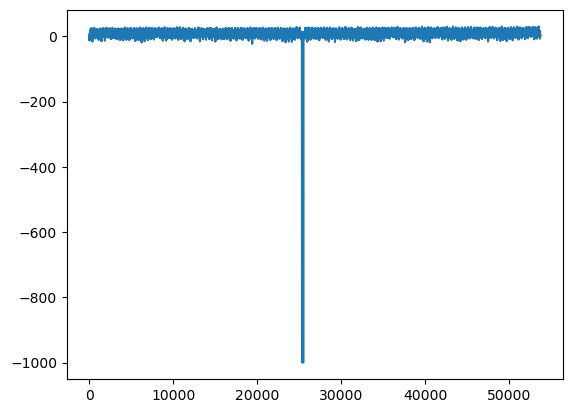

In [124]:
df["Temperature"].plot()

## 4: Time Axis

In [125]:
df["DATE"] = df["DATE"].astype(str)

In [126]:
df["year"] = df["DATE"].str[0:4]
df["month"] = df["DATE"].str[4:6]
df["day"] = df["DATE"].str[6:8]
df.head()

,SOUID,DATE,TG,Q_TG,Temperature,year,month,day
0,127488,18760101,22,0,2.2,1876,01,01
1,127488,18760102,25,0,2.5,1876,01,02
2,127488,18760103,3,0,0.3,1876,01,03
3,127488,18760104,-58,0,-5.8,1876,01,04
4,127488,18760105,-98,0,-9.8,1876,01,05


In [127]:
df = df.set_index(pd.to_datetime(df['year'] + '-' + df['month'] + '-' + df['day']))

In [128]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature,year,month,day
1876-01-01,127488,18760101,22,0,2.2,1876,01,01
1876-01-02,127488,18760102,25,0,2.5,1876,01,02
1876-01-03,127488,18760103,3,0,0.3,1876,01,03
1876-01-04,127488,18760104,-58,0,-5.8,1876,01,04
1876-01-05,127488,18760105,-98,0,-9.8,1876,01,05


<AxesSubplot:>

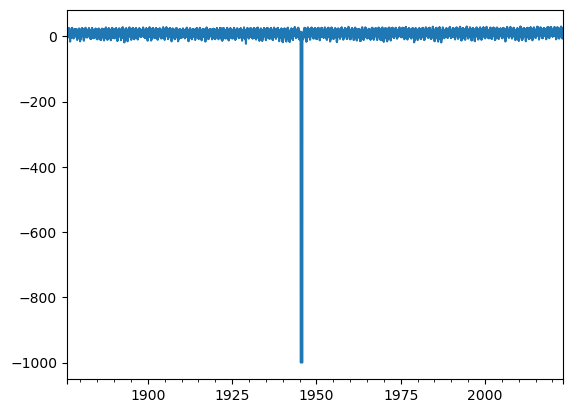

In [129]:
df["Temperature"].plot()

## 5: Missing Values

In [130]:
df.min()

SOUID            111448
DATE           18760101
TG                -9999
Q_TG                  0
Temperature      -999.9
year               1876
month                01
day                  01
dtype: object

In [131]:
df['Temperature'] = df['Temperature'].replace(-999.9, df['Temperature'].median())  # after scaling
df.min()

SOUID            111448
DATE           18760101
TG                -9999
Q_TG                  0
Temperature       -22.6
year               1876
month                01
day                  01
dtype: object

In [132]:
df['Median'] = df['Temperature'].median()

In [133]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature,year,month,day,Median
1876-01-01,127488,18760101,22,0,2.2,1876,01,01,9.4
1876-01-02,127488,18760102,25,0,2.5,1876,01,02,9.4
1876-01-03,127488,18760103,3,0,0.3,1876,01,03,9.4
1876-01-04,127488,18760104,-58,0,-5.8,1876,01,04,9.4
1876-01-05,127488,18760105,-98,0,-9.8,1876,01,05,9.4


<AxesSubplot:>

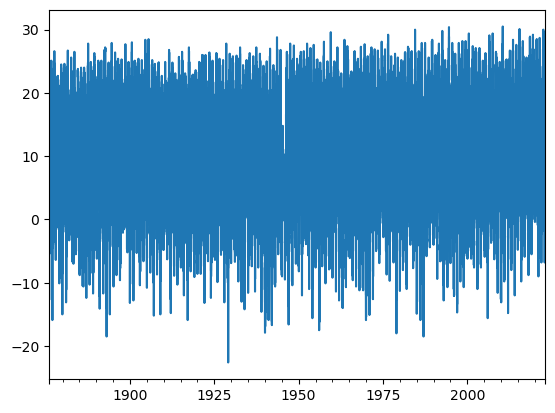

In [134]:
df["Temperature"].plot()

## 6: Cut off the last year

In [135]:
df = df.loc[:'2022-12-31']
df.max()

SOUID            128124
DATE           20221231
TG                  305
Q_TG                  9
Temperature        30.5
year               2022
month                12
day                  31
Median              9.4
dtype: object

In [136]:
df.head()

,SOUID,DATE,TG,Q_TG,Temperature,year,month,day,Median
1876-01-01,127488,18760101,22,0,2.2,1876,01,01,9.4
1876-01-02,127488,18760102,25,0,2.5,1876,01,02,9.4
1876-01-03,127488,18760103,3,0,0.3,1876,01,03,9.4
1876-01-04,127488,18760104,-58,0,-5.8,1876,01,04,9.4
1876-01-05,127488,18760105,-98,0,-9.8,1876,01,05,9.4


In [137]:
yearly = df.resample('Y').median()

In [138]:
df2 = pd.DataFrame(yearly["Temperature"])

In [139]:
df2.head()

,Temperature
1876-12-31,9.40
1877-12-31,8.50
1878-12-31,10.90
1879-12-31,7.90
1880-12-31,9.05


<AxesSubplot:>

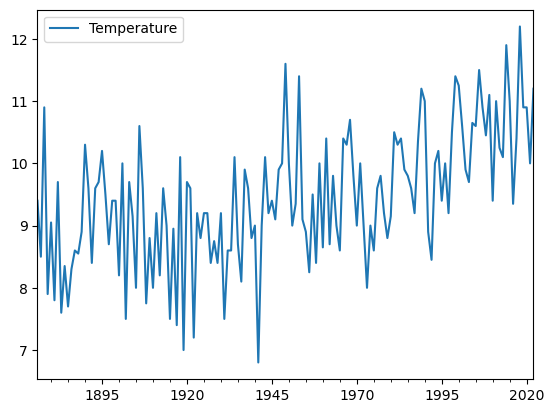

In [140]:
df2.plot()

In [141]:
df2.head()

,Temperature
1876-12-31,9.40
1877-12-31,8.50
1878-12-31,10.90
1879-12-31,7.90
1880-12-31,9.05


In [142]:
df2['Year'] = df2.index.year
df2

,Temperature,Year
1876-12-31,9.40,1876
1877-12-31,8.50,1877
1878-12-31,10.90,1878
1879-12-31,7.90,1879
1880-12-31,9.05,1880
...,...,...
2018-12-31,12.20,2018
2019-12-31,10.90,2019
2020-12-31,10.90,2020
2021-12-31,10.00,2021


In [143]:
df2 = df2.set_index("Year")
df2.head()

,Temperature
Year,
1876,9.40
1877,8.50
1878,10.90
1879,7.90
1880,9.05


In [144]:
df2 = df2.transpose()
df2

Year,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Temperature,9.4,8.5,10.9,7.9,9.05,7.8,9.7,7.6,8.35,7.7,...,10.1,11.9,11.0,9.35,10.4,12.2,10.9,10.9,10.0,11.2


<AxesSubplot:title={'center':'yearly median temperature in Berlin-Tempelhof'}, xlabel='Year'>

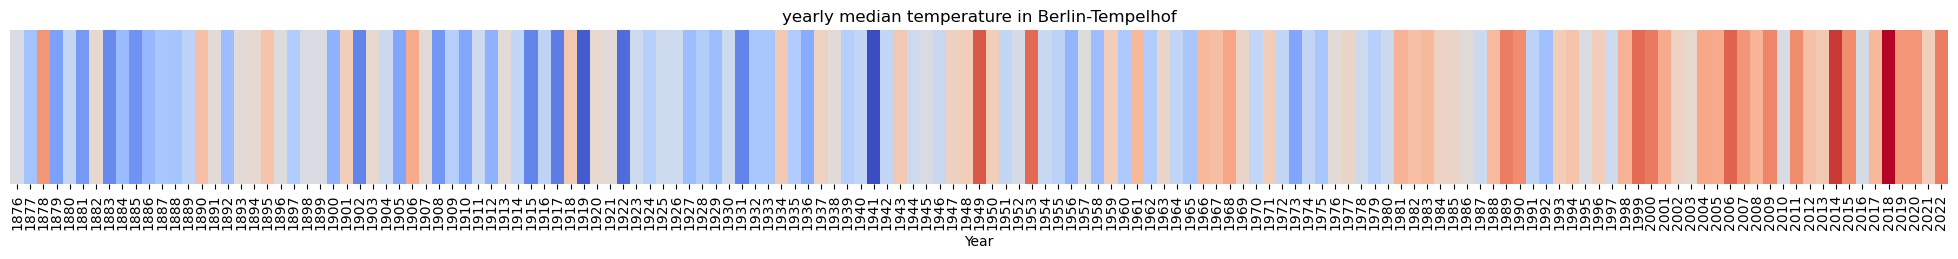

In [145]:
cmap = plt.get_cmap('coolwarm')

xticks=df2.columns

plt.figure(figsize=(25, 2))
plt.title('yearly median temperature in Berlin-Tempelhof')
sns.heatmap(df2, cmap=cmap, cbar=False, yticklabels=[], xticklabels=xticks)
